# Creating 4 different types of models and comparing their performance for our data

## Stacked Model with and without parameter search

In [1]:
#importing the required dataset
import pandas as pd
df_gb = pd.read_csv('ready_for_tree.csv')
df_gb.head()

,Unnamed: 0,id,Title,Episode,Season,character_names,Total Spoken Words,number of scene changes,Sarcasm Index,Emotional Archetype,...,Monica_spoken_words,Phoebe_spoken_words,Joey_spoken_words,Central Perk_occurrences,Monica's Apartment_occurrences,Ross's Apartment_occurrences,Chandler's Apartment_occurrences,Ralph Lauren_occurrences,Bloomingdales_occurrences,Phoebe's Apartment_occurrences
0,0,85987,The Pilot-The Uncut Version,1,1,"['Paul', 'Frannie']",2290,13,0.666667,Uncharted,...,433,166,290,2,3,3,0,0,0,0
1,1,86012,The One With The Sonogram At the End,2,1,"['Barry', 'Geller', 'Marsha', 'Susan', 'Carol'...",2520,11,0.714286,Icarus,...,253,115,73,2,1,0,0,0,0,0
2,2,85981,The One With The Thumb,3,1,"['Lizzie', 'Paula', 'Alan']",2336,14,0.625000,Man in a Hole,...,480,427,185,4,0,0,0,0,0,0
3,3,85983,The One With George Stephanopoulos,4,1,"['Receptionist', 'Joanne', 'Leslie', 'Guy']",2721,15,0.333333,Rags to Riches,...,418,302,163,2,0,0,0,0,0,0
4,4,86034,The One With The East German Laundry Detergant,5,1,"['Angela', 'Bob', 'Janice']",2765,16,0.625000,Man in a Hole,...,323,235,411,6,1,1,0,0,0,0


In [2]:
#Looking at the columns
df_gb.columns

Index(['Unnamed: 0', 'id', 'Title', 'Episode', 'Season', 'character_names',
       'Total Spoken Words', 'number of scene changes', 'Sarcasm Index',
       'Emotional Archetype', 'vote_average', 'holiday_episode',
       'director_popularity', 'writer_popularity',
       'Joey_Rachel_Monica_Chandler_itemset',
       'Rachel_Ross_Monica_Chandler_itemset',
       'Joey_Phoebe_Monica_Chandler_itemset',
       'Joey_Ross_Monica_Chandler_itemset',
       'Rachel_Phoebe_Monica_Chandler_itemset',
       'Joey_Rachel_Phoebe_Chandler_itemset',
       'Joey_Rachel_Ross_Chandler_itemset',
       'Joey_Ross_Phoebe_Chandler_itemset',
       'Ross_Phoebe_Monica_Chandler_itemset',
       'Joey_Rachel_Phoebe_Monica_itemset', 'sentiment', 'Ross_spoken_words',
       'Rachel_spoken_words', 'Chandler_spoken_words', 'Monica_spoken_words',
       'Phoebe_spoken_words', 'Joey_spoken_words', 'Central Perk_occurrences',
       'Monica's Apartment_occurrences', 'Ross's Apartment_occurrences',
       'Chandler'

In [3]:
#dropping unwanted columns for gradient boost
df_gb.drop(columns = ['Unnamed: 0', 'id', 'Title', 'Episode', 'Season', 'character_names'],axis=1,inplace = True)
df_gb.columns

Index(['Total Spoken Words', 'number of scene changes', 'Sarcasm Index',
       'Emotional Archetype', 'vote_average', 'holiday_episode',
       'director_popularity', 'writer_popularity',
       'Joey_Rachel_Monica_Chandler_itemset',
       'Rachel_Ross_Monica_Chandler_itemset',
       'Joey_Phoebe_Monica_Chandler_itemset',
       'Joey_Ross_Monica_Chandler_itemset',
       'Rachel_Phoebe_Monica_Chandler_itemset',
       'Joey_Rachel_Phoebe_Chandler_itemset',
       'Joey_Rachel_Ross_Chandler_itemset',
       'Joey_Ross_Phoebe_Chandler_itemset',
       'Ross_Phoebe_Monica_Chandler_itemset',
       'Joey_Rachel_Phoebe_Monica_itemset', 'sentiment', 'Ross_spoken_words',
       'Rachel_spoken_words', 'Chandler_spoken_words', 'Monica_spoken_words',
       'Phoebe_spoken_words', 'Joey_spoken_words', 'Central Perk_occurrences',
       'Monica's Apartment_occurrences', 'Ross's Apartment_occurrences',
       'Chandler's Apartment_occurrences', 'Ralph Lauren_occurrences',
       'Bloomingdales_

In [4]:
#looking at the new dataset
pd.set_option('display.max_columns', None)
df_gb.head()

,Total Spoken Words,number of scene changes,Sarcasm Index,Emotional Archetype,vote_average,holiday_episode,director_popularity,writer_popularity,Joey_Rachel_Monica_Chandler_itemset,Rachel_Ross_Monica_Chandler_itemset,Joey_Phoebe_Monica_Chandler_itemset,Joey_Ross_Monica_Chandler_itemset,Rachel_Phoebe_Monica_Chandler_itemset,Joey_Rachel_Phoebe_Chandler_itemset,Joey_Rachel_Ross_Chandler_itemset,Joey_Ross_Phoebe_Chandler_itemset,Ross_Phoebe_Monica_Chandler_itemset,Joey_Rachel_Phoebe_Monica_itemset,sentiment,Ross_spoken_words,Rachel_spoken_words,Chandler_spoken_words,Monica_spoken_words,Phoebe_spoken_words,Joey_spoken_words,Central Perk_occurrences,Monica's Apartment_occurrences,Ross's Apartment_occurrences,Chandler's Apartment_occurrences,Ralph Lauren_occurrences,Bloomingdales_occurrences,Phoebe's Apartment_occurrences
0,2290,13,0.666667,Uncharted,7.081,0,3.7445,4.7685,1,1,0,1,0,0,0,0,0,0,0.058835,357,394,315,433,166,290,2,3,3,0,0,0,0
1,2520,11,0.714286,Icarus,7.333,0,3.4485,4.7685,0,0,1,0,0,0,0,0,0,0,0.045503,686,437,252,253,115,73,2,1,0,0,0,0,0
2,2336,14,0.625000,Man in a Hole,8.130,0,3.4485,1.7880,0,1,0,0,0,0,0,0,0,0,0.029584,252,206,449,480,427,185,4,0,0,0,0,0,0
3,2721,15,0.333333,Rags to Riches,7.840,0,3.4485,1.3880,0,1,0,0,1,0,1,0,0,0,0.043531,440,533,391,418,302,163,2,0,0,0,0,0,0
4,2765,16,0.625000,Man in a Hole,8.041,0,2.1950,1.0455,0,0,0,0,0,0,0,0,0,0,0.065272,560,371,349,323,235,411,6,1,1,0,0,0,0


In [5]:
#one-hot encoding correction of the scene occurences
columns_to_transform = [
    'Central Perk_occurrences',
    "Monica's Apartment_occurrences",
    "Ross's Apartment_occurrences",
    "Chandler's Apartment_occurrences",
    'Ralph Lauren_occurrences',
    'Bloomingdales_occurrences',
    "Phoebe's Apartment_occurrences"
]

# Convert non-zero values to 1 only for the specified columns
df_gb[columns_to_transform] = df_gb[columns_to_transform].applymap(lambda x: 1 if x != 0 else 0)
df_gb.head()

,Total Spoken Words,number of scene changes,Sarcasm Index,Emotional Archetype,vote_average,holiday_episode,director_popularity,writer_popularity,Joey_Rachel_Monica_Chandler_itemset,Rachel_Ross_Monica_Chandler_itemset,Joey_Phoebe_Monica_Chandler_itemset,Joey_Ross_Monica_Chandler_itemset,Rachel_Phoebe_Monica_Chandler_itemset,Joey_Rachel_Phoebe_Chandler_itemset,Joey_Rachel_Ross_Chandler_itemset,Joey_Ross_Phoebe_Chandler_itemset,Ross_Phoebe_Monica_Chandler_itemset,Joey_Rachel_Phoebe_Monica_itemset,sentiment,Ross_spoken_words,Rachel_spoken_words,Chandler_spoken_words,Monica_spoken_words,Phoebe_spoken_words,Joey_spoken_words,Central Perk_occurrences,Monica's Apartment_occurrences,Ross's Apartment_occurrences,Chandler's Apartment_occurrences,Ralph Lauren_occurrences,Bloomingdales_occurrences,Phoebe's Apartment_occurrences
0,2290,13,0.666667,Uncharted,7.081,0,3.7445,4.7685,1,1,0,1,0,0,0,0,0,0,0.058835,357,394,315,433,166,290,1,1,1,0,0,0,0
1,2520,11,0.714286,Icarus,7.333,0,3.4485,4.7685,0,0,1,0,0,0,0,0,0,0,0.045503,686,437,252,253,115,73,1,1,0,0,0,0,0
2,2336,14,0.625000,Man in a Hole,8.130,0,3.4485,1.7880,0,1,0,0,0,0,0,0,0,0,0.029584,252,206,449,480,427,185,1,0,0,0,0,0,0
3,2721,15,0.333333,Rags to Riches,7.840,0,3.4485,1.3880,0,1,0,0,1,0,1,0,0,0,0.043531,440,533,391,418,302,163,1,0,0,0,0,0,0
4,2765,16,0.625000,Man in a Hole,8.041,0,2.1950,1.0455,0,0,0,0,0,0,0,0,0,0,0.065272,560,371,349,323,235,411,1,1,1,0,0,0,0


In [6]:
#one hot encoding the emotional archetypes column
df_gb = pd.concat([df_gb, pd.get_dummies(df_gb['Emotional Archetype'], prefix='Emotional_Archetype')], axis=1)
df_gb.drop('Emotional Archetype', axis=1, inplace=True)

In [7]:
df_gb.head() # looking at the data frame

,Total Spoken Words,number of scene changes,Sarcasm Index,vote_average,holiday_episode,director_popularity,writer_popularity,Joey_Rachel_Monica_Chandler_itemset,Rachel_Ross_Monica_Chandler_itemset,Joey_Phoebe_Monica_Chandler_itemset,Joey_Ross_Monica_Chandler_itemset,Rachel_Phoebe_Monica_Chandler_itemset,Joey_Rachel_Phoebe_Chandler_itemset,Joey_Rachel_Ross_Chandler_itemset,Joey_Ross_Phoebe_Chandler_itemset,Ross_Phoebe_Monica_Chandler_itemset,Joey_Rachel_Phoebe_Monica_itemset,sentiment,Ross_spoken_words,Rachel_spoken_words,Chandler_spoken_words,Monica_spoken_words,Phoebe_spoken_words,Joey_spoken_words,Central Perk_occurrences,Monica's Apartment_occurrences,Ross's Apartment_occurrences,Chandler's Apartment_occurrences,Ralph Lauren_occurrences,Bloomingdales_occurrences,Phoebe's Apartment_occurrences,Emotional_Archetype_Cinderella,Emotional_Archetype_Icarus,Emotional_Archetype_Man in a Hole,Emotional_Archetype_Oedipus,Emotional_Archetype_Rags to Riches,Emotional_Archetype_Uncharted
0,2290,13,0.666667,7.081,0,3.7445,4.7685,1,1,0,1,0,0,0,0,0,0,0.058835,357,394,315,433,166,290,1,1,1,0,0,0,0,0,0,0,0,0,1
1,2520,11,0.714286,7.333,0,3.4485,4.7685,0,0,1,0,0,0,0,0,0,0,0.045503,686,437,252,253,115,73,1,1,0,0,0,0,0,0,1,0,0,0,0
2,2336,14,0.625000,8.130,0,3.4485,1.7880,0,1,0,0,0,0,0,0,0,0,0.029584,252,206,449,480,427,185,1,0,0,0,0,0,0,0,0,1,0,0,0
3,2721,15,0.333333,7.840,0,3.4485,1.3880,0,1,0,0,1,0,1,0,0,0,0.043531,440,533,391,418,302,163,1,0,0,0,0,0,0,0,0,0,0,1,0
4,2765,16,0.625000,8.041,0,2.1950,1.0455,0,0,0,0,0,0,0,0,0,0,0.065272,560,371,349,323,235,411,1,1,1,0,0,0,0,0,0,1,0,0,0


In [8]:
df_gb.columns

Index(['Total Spoken Words', 'number of scene changes', 'Sarcasm Index',
       'vote_average', 'holiday_episode', 'director_popularity',
       'writer_popularity', 'Joey_Rachel_Monica_Chandler_itemset',
       'Rachel_Ross_Monica_Chandler_itemset',
       'Joey_Phoebe_Monica_Chandler_itemset',
       'Joey_Ross_Monica_Chandler_itemset',
       'Rachel_Phoebe_Monica_Chandler_itemset',
       'Joey_Rachel_Phoebe_Chandler_itemset',
       'Joey_Rachel_Ross_Chandler_itemset',
       'Joey_Ross_Phoebe_Chandler_itemset',
       'Ross_Phoebe_Monica_Chandler_itemset',
       'Joey_Rachel_Phoebe_Monica_itemset', 'sentiment', 'Ross_spoken_words',
       'Rachel_spoken_words', 'Chandler_spoken_words', 'Monica_spoken_words',
       'Phoebe_spoken_words', 'Joey_spoken_words', 'Central Perk_occurrences',
       'Monica's Apartment_occurrences', 'Ross's Apartment_occurrences',
       'Chandler's Apartment_occurrences', 'Ralph Lauren_occurrences',
       'Bloomingdales_occurrences', 'Phoebe's Apartm

In [9]:
X = df_gb.drop('vote_average',axis=1)
y = df_gb['vote_average']

In [14]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Assuming you have a dataset 'X' with features and 'y' with continuous targets

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)

# Step 2: Train the first boosted decision tree (AdaBoost)
ada_boost_model = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=3),
    n_estimators=50,  # You can adjust the number of estimators
    random_state=42
)

ada_boost_model.fit(X_train, y_train)

# Step 3: Train the second boosted decision tree (Gradient Boosting)
gradient_boost_model = GradientBoostingRegressor(
    n_estimators=50,  # You can adjust the number of estimators
    max_depth=5,       # You can adjust the maximum depth of the trees
    random_state=42
)

gradient_boost_model.fit(X_train, y_train)

# Step 4: Create a meta-model (Stacking)
# Here, we use a Linear Regression model as the meta-model, but you can choose a different one.
meta_model = LinearRegression()

stacked_model = StackingRegressor(
    estimators=[('ada_boost', ada_boost_model), ('gradient_boost', gradient_boost_model)],
    final_estimator=meta_model
)

# Step 5: Train the stacked model
stacked_model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred_stacked = stacked_model.predict(X_test)

# Step 7: Evaluate the performance of the stacked model
mse_stacked = mean_squared_error(y_test, y_pred_stacked)
print(f"Stacked Model Mean Squared Error: {mse_stacked}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Stacked Model Mean Squared Error: 0.07166391336848651


In [15]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mse_stacked)
print(f"RMSE: {rmse}")

RMSE: 0.2677011643017014


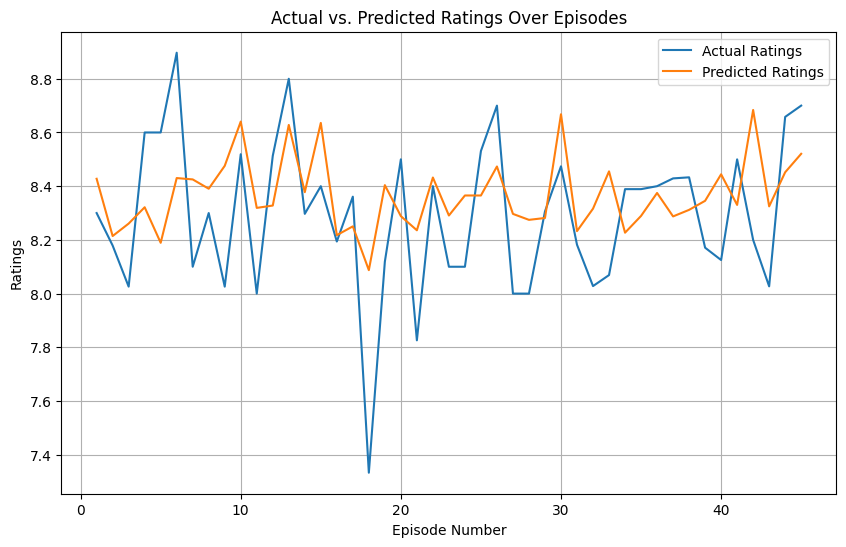

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test contains the actual ratings and y_pred_stacked contains the predicted ratings
# Replace these with your actual variable names

# Generate episode numbers or indices for the x-axis
episode_numbers = np.arange(len(y_test)) + 1

# Line plot of actual and predicted ratings
plt.figure(figsize=(10, 6))
plt.plot(episode_numbers, y_test, label='Actual Ratings')
plt.plot(episode_numbers, y_pred_stacked, label='Predicted Ratings')
plt.title('Actual vs. Predicted Ratings Over Episodes')
plt.xlabel('Episode Number')
plt.ylabel('Ratings')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from scipy.stats import randint

# Assuming you have a dataset 'X' with features and 'y' with continuous targets

# Suppress warnings
warnings.filterwarnings("ignore")

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 147)

# Step 2: Define the parameter grid for RandomizedSearchCV
param_grid_ada_boost = {
    'base_estimator': [DecisionTreeRegressor(max_depth=d) for d in range(1, 11)],
    'n_estimators': randint(50, 200),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5]
}

param_grid_gradient_boost = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(1, 10),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5]
}

# Step 3: Create the base models with RandomizedSearchCV
ada_boost_model = RandomizedSearchCV(
    AdaBoostRegressor(random_state=42),
    param_distributions=param_grid_ada_boost,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42
)

gradient_boost_model = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_distributions=param_grid_gradient_boost,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42
)

# Step 4: Train the base models
ada_boost_model.fit(X_train, y_train)
gradient_boost_model.fit(X_train, y_train)

# Step 5: Get the best hyperparameters from RandomizedSearchCV
best_params_ada_boost = ada_boost_model.best_params_
best_params_gradient_boost = gradient_boost_model.best_params_

# Step 6: Create a meta-model (Stacking)
meta_model = LinearRegression()

# Step 7: Create the StackingRegressor
stacked_model = StackingRegressor(
    estimators=[
        ('ada_boost', AdaBoostRegressor(**best_params_ada_boost, random_state=42)),
        ('gradient_boost', GradientBoostingRegressor(**best_params_gradient_boost, random_state=42))
    ],
    final_estimator=meta_model
)

# Step 8: Train the stacked model
stacked_model.fit(X_train, y_train)

# Step 9: Make predictions on the test set
y_pred_stacked = stacked_model.predict(X_test)

# Step 10: Evaluate the performance of the stacked model
mse_stacked = mean_squared_error(y_test, y_pred_stacked)
print(f"Stacked Model Mean Squared Error: {mse_stacked}")

Stacked Model Mean Squared Error: 0.05406448084338704


In [32]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mse_stacked)
print(f"RMSE: {rmse}")

RMSE: 0.2325177000647199


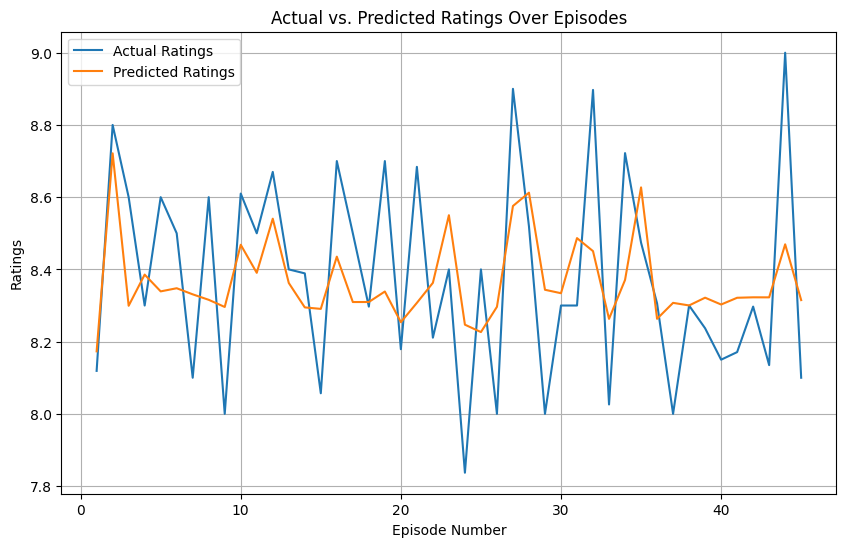

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test contains the actual ratings and y_pred_stacked contains the predicted ratings
# Replace these with your actual variable names

# Generate episode numbers or indices for the x-axis
episode_numbers = np.arange(len(y_test)) + 1

# Line plot of actual and predicted ratings
plt.figure(figsize=(10, 6))
plt.plot(episode_numbers, y_test, label='Actual Ratings')
plt.plot(episode_numbers, y_pred_stacked, label='Predicted Ratings')
plt.title('Actual vs. Predicted Ratings Over Episodes')
plt.xlabel('Episode Number')
plt.ylabel('Ratings')
plt.legend()
plt.grid(True)
plt.show()

## Just Gradient Boost

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming you have a dataset 'X' with features and 'y' with continuous targets
# Replace these with your actual variable names

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

# Step 2: Create the Gradient Boosting model
gradient_boost_model = GradientBoostingRegressor(
    n_estimators=100,  # You can adjust the number of estimators
    max_depth=5,        # You can adjust the maximum depth of the trees
    learning_rate=0.1,  # You can adjust the learning rate
    random_state=42
)

# Step 3: Train the model
gradient_boost_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = gradient_boost_model.predict(X_test)

# Step 5: Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 0.10820815609453406
Root Mean Squared Error: 0.32895008146303


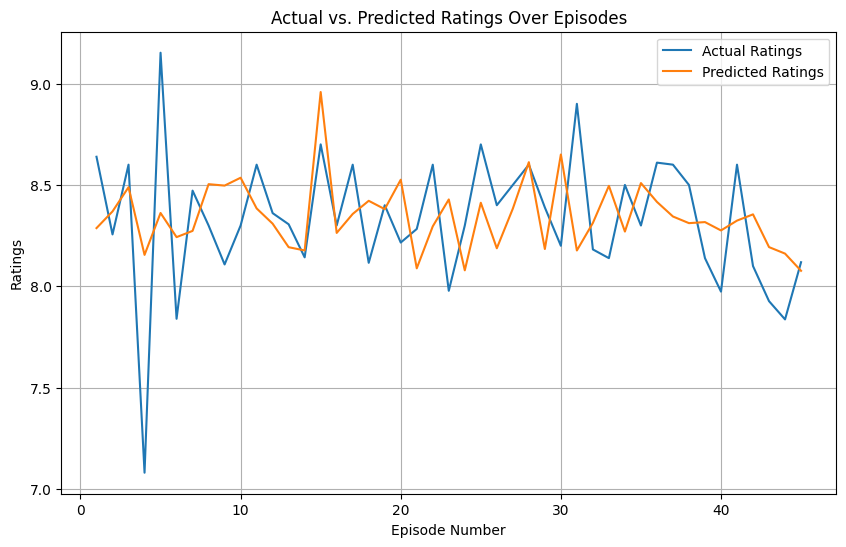

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test contains the actual ratings and y_pred_stacked contains the predicted ratings
# Replace these with your actual variable names

# Generate episode numbers or indices for the x-axis
episode_numbers = np.arange(len(y_test)) + 1

# Line plot of actual and predicted ratings
plt.figure(figsize=(10, 6))
plt.plot(episode_numbers, y_test, label='Actual Ratings')
plt.plot(episode_numbers, y_pred, label='Predicted Ratings')
plt.title('Actual vs. Predicted Ratings Over Episodes')
plt.xlabel('Episode Number')
plt.ylabel('Ratings')
plt.legend()
plt.grid(True)
plt.show()

## Just Adaboost

In [35]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming you have a dataset 'X' with features and 'y' with continuous targets
# Replace these with your actual variable names

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Step 2: Create the AdaBoost model with DecisionTreeRegressor as the base estimator
ada_boost_model = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=3),  # You can adjust the max_depth
    n_estimators=100,      # You can adjust the number of estimators
    learning_rate=1.0,     # You can adjust the learning rate
    random_state=42
)

# Step 3: Train the model
ada_boost_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = ada_boost_model.predict(X_test)

# Step 5: Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.09856966974216277
Root Mean Squared Error: 0.31395807003828197


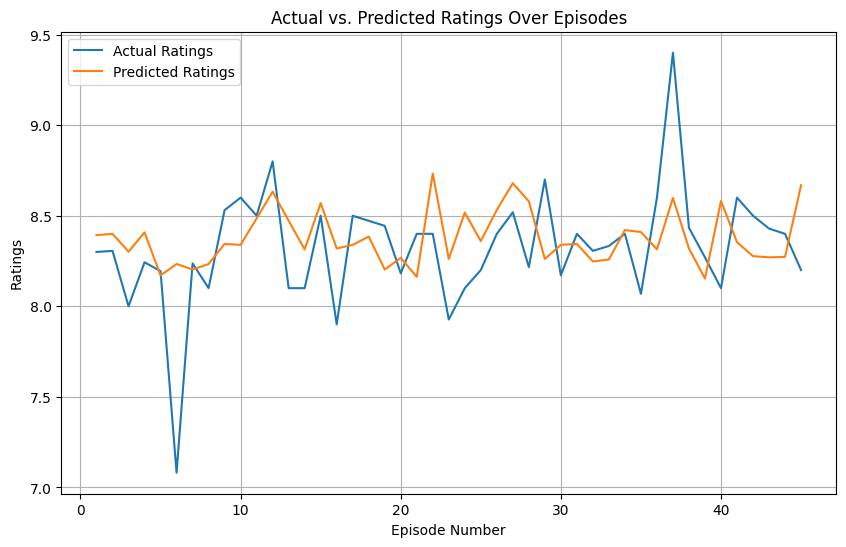

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test contains the actual ratings and y_pred_stacked contains the predicted ratings
# Replace these with your actual variable names

# Generate episode numbers or indices for the x-axis
episode_numbers = np.arange(len(y_test)) + 1

# Line plot of actual and predicted ratings
plt.figure(figsize=(10, 6))
plt.plot(episode_numbers, y_test, label='Actual Ratings')
plt.plot(episode_numbers, y_pred, label='Predicted Ratings')
plt.title('Actual vs. Predicted Ratings Over Episodes')
plt.xlabel('Episode Number')
plt.ylabel('Ratings')
plt.legend()
plt.grid(True)
plt.show()

## Random Forest Regressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming you have a dataset 'X' with features and 'y' with continuous targets
# Replace these with your actual variable names

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 34)

# Step 2: Create the Random Forest model
random_forest_model = RandomForestRegressor(
    n_estimators=100,      # You can adjust the number of estimators
    max_depth=None,        # You can adjust the maximum depth of the trees
    random_state=42
)

# Step 3: Train the model
random_forest_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Step 5: Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 0.11605682844444462
Root Mean Squared Error: 0.34067114413235033


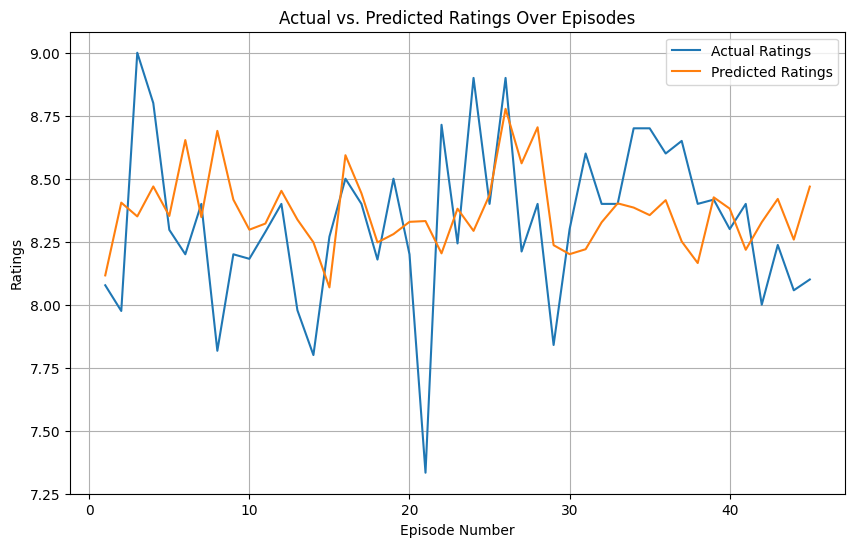

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test contains the actual ratings and y_pred_stacked contains the predicted ratings
# Replace these with your actual variable names

# Generate episode numbers or indices for the x-axis
episode_numbers = np.arange(len(y_test)) + 1

# Line plot of actual and predicted ratings
plt.figure(figsize=(10, 6))
plt.plot(episode_numbers, y_test, label='Actual Ratings')
plt.plot(episode_numbers, y_pred, label='Predicted Ratings')
plt.title('Actual vs. Predicted Ratings Over Episodes')
plt.xlabel('Episode Number')
plt.ylabel('Ratings')
plt.legend()
plt.grid(True)
plt.show()

## Barplot of results

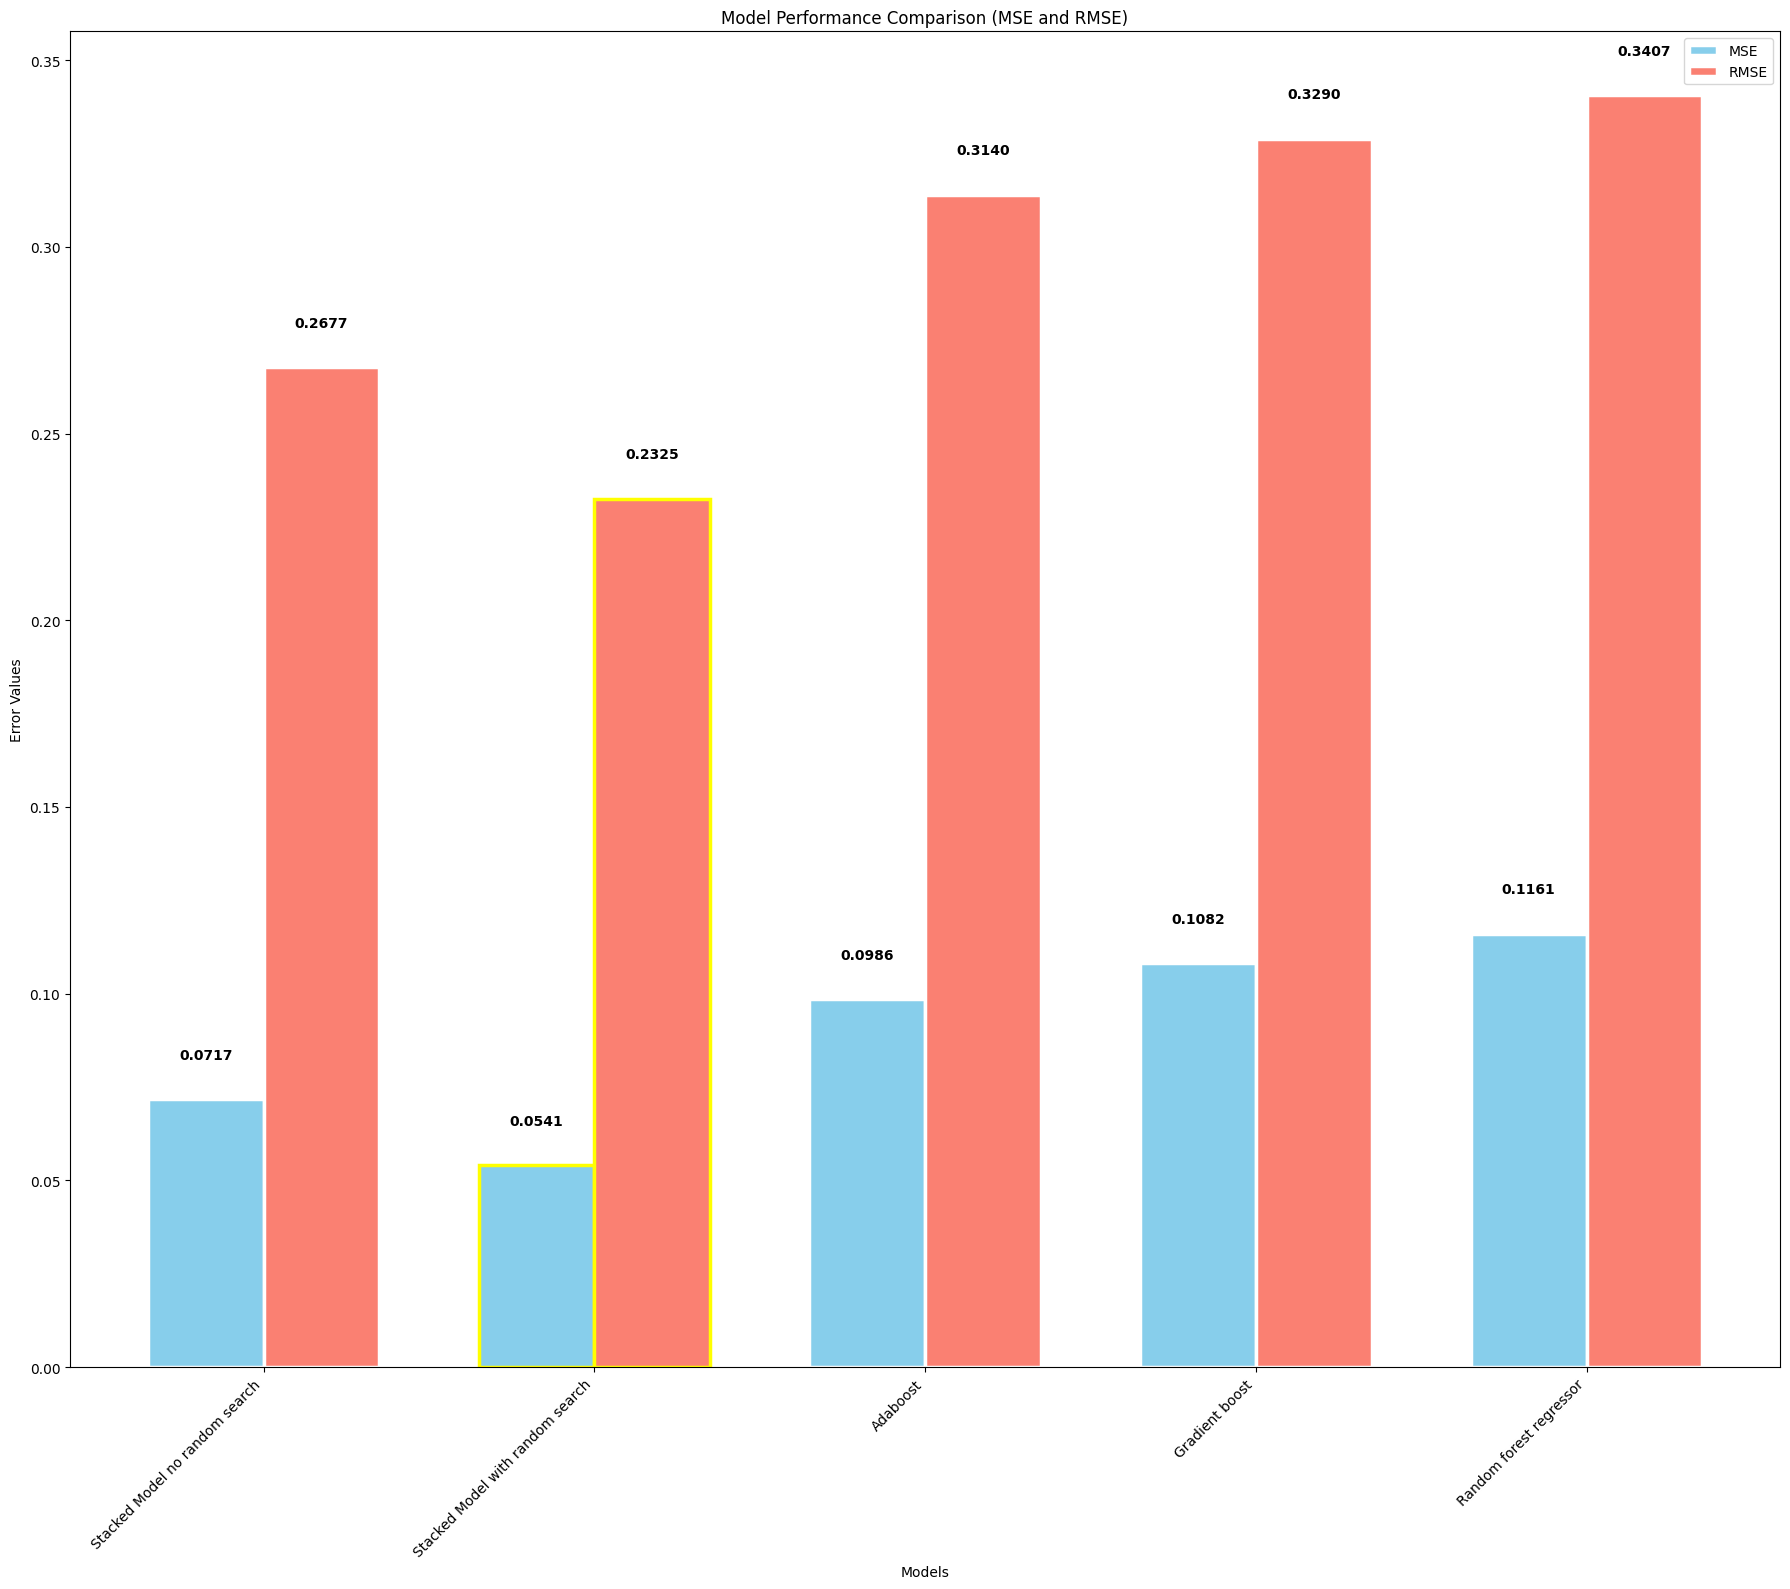

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Stacked Model no random search', 'Stacked Model with random search', 'Adaboost', 'Gradient boost', 'Random forest regressor']

# MSE and RMSE values for each model
mse_values = [0.07166391336848651, 0.05406448084338704, 0.09856966974216277, 0.10820815609453406, 0.11605682844444462]
rmse_values = [0.2677011643017014, 0.2325177000647199, 0.31395807003828197, 0.32895008146303, 0.34067114413235033]

# Find the index of the minimum values for MSE and RMSE
min_mse_index = np.argmin(mse_values)
min_rmse_index = np.argmin(rmse_values)

# Set up bar positions
bar_width = 0.35
index = np.arange(len(models))

# Define custom colors for MSE and RMSE
mse_color = 'skyblue'
rmse_color = 'salmon'
highlight_edgecolor = 'yellow'

# Create a double bar plot with outlined bars (increased linewidth)
fig, ax = plt.subplots(figsize=(18, 16))
bar1 = ax.bar(index, mse_values, bar_width, label='MSE', color=mse_color, edgecolor=[highlight_edgecolor if i == min_mse_index else 'white' for i in range(len(models))], linewidth=2.5)
bar2 = ax.bar(index + bar_width, rmse_values, bar_width, label='RMSE', color=rmse_color, edgecolor=[highlight_edgecolor if i == min_rmse_index else 'white' for i in range(len(models))], linewidth=2.5)

# Add labels on top of the bars
for i, v in enumerate(mse_values):
    ax.text(i, v + 0.01, f'{v:.4f}', color='black', ha='center', va='bottom', fontweight='bold')

for i, v in enumerate(rmse_values):
    ax.text(i + bar_width, v + 0.01, f'{v:.4f}', color='black', ha='center', va='bottom', fontweight='bold')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Error Values')
ax.set_title('Model Performance Comparison (MSE and RMSE)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()